<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Service-description" data-toc-modified-id="Service-description-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Service description</a></span></li><li><span><a href="#Data-description" data-toc-modified-id="Data-description-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Data description</a></span></li><li><span><a href="#Objective-of-the-project" data-toc-modified-id="Objective-of-the-project-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Objective of the project</a></span></li><li><span><a href="#Work-plan" data-toc-modified-id="Work-plan-0.4"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>Work plan</a></span></li></ul></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Data-analysis-and-preprocessing" data-toc-modified-id="Data-analysis-and-preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data analysis and preprocessing</a></span><ul class="toc-item"><li><span><a href="#Data-analysis-conclusion" data-toc-modified-id="Data-analysis-conclusion-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data analysis conclusion</a></span></li></ul></li><li><span><a href="#Model-learning" data-toc-modified-id="Model-learning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model learning</a></span><ul class="toc-item"><li><span><a href="#Model-learning-conclusion" data-toc-modified-id="Model-learning-conclusion-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Model learning conclusion</a></span></li><li><span><a href="#Best-model-testing-conclusion" data-toc-modified-id="Best-model-testing-conclusion-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Best model testing conclusion</a></span></li></ul></li><li><span><a href="#Report" data-toc-modified-id="Report-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Report</a></span><ul class="toc-item"><li><span><a href="#Project-description" data-toc-modified-id="Project-description-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Project description</a></span></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Data preprocessing</a></span></li><li><span><a href="#Exploratory-analysis" data-toc-modified-id="Exploratory-analysis-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Exploratory analysis</a></span></li><li><span><a href="#Model-learning" data-toc-modified-id="Model-learning-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Model learning</a></span></li><li><span><a href="#Best-model-and-its-quality" data-toc-modified-id="Best-model-and-its-quality-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Best model and its quality</a></span><ul class="toc-item"><li><span><a href="#Model" data-toc-modified-id="Model-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Model</a></span></li><li><span><a href="#Quality" data-toc-modified-id="Quality-4.5.2"><span class="toc-item-num">4.5.2&nbsp;&nbsp;</span>Quality</a></span></li><li><span><a href="#Comparing-with-Constant-model" data-toc-modified-id="Comparing-with-Constant-model-4.5.3"><span class="toc-item-num">4.5.3&nbsp;&nbsp;</span>Comparing with Constant model</a></span></li><li><span><a href="#Features-importance-for-best-model" data-toc-modified-id="Features-importance-for-best-model-4.5.4"><span class="toc-item-num">4.5.4&nbsp;&nbsp;</span>Features importance for best model</a></span></li></ul></li></ul></li><li><span><a href="#Business-recommendation" data-toc-modified-id="Business-recommendation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Business recommendation</a></span></li></ul></div>

# Churn prediction for telecom company

Telecom operator would like to predict churn of clients. If it's discovered that useris planning to leave, company will offer promotional codes and special plan options. Telecom's marketing team has collected some of clients' personal data, including information about their plans and contracts.

### Service description

Company mainly provides two types of services: 

1. Landline communication. The telephone can be connected to several lines simultaneously.
2. Internet. The network can be set up via a telephone line (DSL, digital subscriber line) or through a fiber optic cable.  

Some other services the company provides include:

- Internet security: antivirus software (DeviceProtection) and a malicious website blocker (OnlineSecurity)
- A dedicated technical support line (TechSupport)
- Cloud file storage and data backup (OnlineBackup)
- TV streaming (StreamingTV) and a movie directory (StreamingMovies)

The clients can choose either a monthly payment or sign a 1- or 2-year contract. They can use various payment methods and receive an electronic invoice after a transaction.

### Data description 

The data consists of files obtained from different sources:

- `contract.csv` — contract information
- `personal.csv` — the client's personal data
- `internet.csv` — information about Internet services
- `phone.csv` — information about telephone services

In each file, the column `customerID` contains a unique code assigned to each client.

The contract information is valid as of February 1, 2020.

### Objective of the project

By October 22, 2022 we need to build a model to get best classification possible on the target variable with ROC AUC more than 0,88

### Work plan

**1. Prepare data:**

   - Add target feature in the sheet contract.csv from EndDate feature, where 1 means client left, 0 - still with company. 

   - Change boolean values into numerical in all sheets.

   - Merge all sheets by customerID feature.
   
   - Formate names of features
   
   - Fill missing values, make type conversion, EDA.


**2. Build model:**

   - Build 2-3 models.

   - Learn models and check their quality.
   
   - Choose best model and ckeck it on test data set.

**3. Make conclusion.**
     
   - Conclusion and recommendations.

## Load data

In [1]:
import warnings                   
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import phik
from phik.report import plot_correlation_matrix
from phik import report

import category_encoders as ce
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.dummy import DummyClassifier

from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

In [2]:
try:
    contract = pd.read_csv('C:/Users/SATVRN/Desktop/Учеба/16 Финальный проект/contract.csv')
    internet = pd.read_csv('C:/Users/SATVRN/Desktop/Учеба/16 Финальный проект/internet.csv')
    personal = pd.read_csv('C:/Users/SATVRN/Desktop/Учеба/16 Финальный проект/personal.csv')
    phone = pd.read_csv('C:/Users/SATVRN/Desktop/Учеба/16 Финальный проект/phone.csv')

    
except:
    contract = pd.read_csv('/datasets/final_provider/contract.csv')
    internet = pd.read_csv('/datasets/final_provider/internet.csv')
    personal = pd.read_csv('/datasets/final_provider/personal.csv')
    phone = pd.read_csv('/datasets/final_provider/phone.csv') 

In [3]:
def get_data_name(data):
    name =[x for x in globals() if globals()[x] is data][0]
    return name

## Data analysis and preprocessing

In [4]:
datas = [contract, internet, personal, phone]
for data in datas:
    print('\n\033[1m' + 'Dataframe info', get_data_name(data), '\n')
    print('Random five lines:' + '\033[0m')
    display(data.sample(5))
    print('\n\033[1m' + 'General info:\n' + '\033[0m')
    data.info()
    print('\n\033[1m' + 'Descriptive statistics:\n' + '\033[0m')
    display(data.describe(include='all'))
    print('\n\033[1m' + 'Number of explicit duplicates:\n' + '\033[0m')
    display(data.duplicated().sum())
    print('\n\033[1m' + 'Number of missing values:\n' + '\033[0m')
    display(data.isna().sum())
    print(100*'-')


Dataframe info contract 

Random five lines:


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
61,1215-FIGMP,2015-02-01,No,Month-to-month,Yes,Bank transfer (automatic),89.90,5450.7
5660,1121-QSIVB,2016-06-01,No,One year,Yes,Mailed check,77.55,3471.1
6024,5095-AESKG,2019-09-01,2019-12-01 00:00:00,Month-to-month,Yes,Credit card (automatic),91.50,242.95
2346,0020-INWCK,2014-03-01,No,Two year,Yes,Credit card (automatic),95.75,6849.4
3945,3815-SLMEF,2019-09-01,2019-12-01 00:00:00,Month-to-month,No,Mailed check,34.25,139.35



General info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB

Descriptive statistics:



,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,7043,7043,7043,7043,7043,7043,7043.000000,7043
unique,7043,77,5,3,2,4,NaN,6531
top,7590-VHVEG,2014-02-01,No,Month-to-month,Yes,Electronic check,NaN,
freq,1,366,5174,3875,4171,2365,NaN,11
mean,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN



Number of explicit duplicates:



0


Number of missing values:



customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

----------------------------------------------------------------------------------------------------

Dataframe info internet 

Random five lines:


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
1823,4967-WPNCF,DSL,Yes,Yes,Yes,Yes,Yes,Yes
2342,2207-QPJED,Fiber optic,No,No,Yes,Yes,Yes,No
5327,6300-BWMJX,Fiber optic,No,No,Yes,Yes,Yes,No
945,5673-FSSMF,DSL,No,No,No,No,No,Yes
5176,9888-ZCUMM,DSL,Yes,No,Yes,Yes,Yes,Yes



General info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB

Descriptive statistics:



,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785



Number of explicit duplicates:



0


Number of missing values:



customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

----------------------------------------------------------------------------------------------------

Dataframe info personal 

Random five lines:


,customerID,gender,SeniorCitizen,Partner,Dependents
5896,1635-NZATJ,Male,1,Yes,No
138,6217-KDYWC,Male,0,No,Yes
5691,5619-XZZKR,Male,0,No,No
1167,4189-NAKJS,Male,0,No,No
636,7954-MLBUN,Male,0,No,No



General info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB

Descriptive statistics:



,customerID,gender,SeniorCitizen,Partner,Dependents
count,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2
top,7590-VHVEG,Male,NaN,No,No
freq,1,3555,NaN,3641,4933
mean,NaN,NaN,0.162147,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN



Number of explicit duplicates:



0


Number of missing values:



customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

----------------------------------------------------------------------------------------------------

Dataframe info phone 

Random five lines:


,customerID,MultipleLines
3733,6627-CFOSN,Yes
1267,0471-LVHGK,Yes
1298,4652-ODEVH,Yes
626,2682-KEVRP,No
1073,8399-YNDCH,No



General info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB

Descriptive statistics:



,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390



Number of explicit duplicates:



0


Number of missing values:



customerID       0
MultipleLines    0
dtype: int64

----------------------------------------------------------------------------------------------------


Text(0, 0.5, 'Quantity')

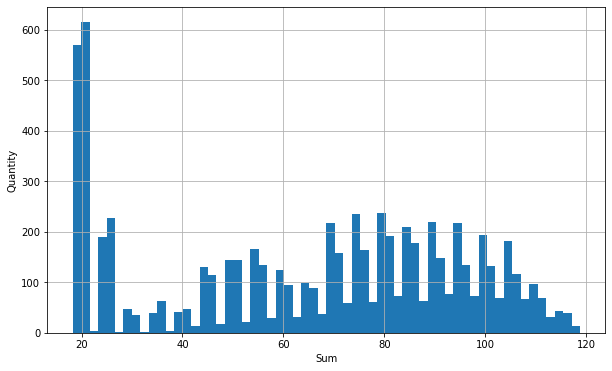

In [5]:
contract['MonthlyCharges'].hist(bins=60, 
                        figsize=(10,6))
plt.xlabel('Sum')
plt.ylabel('Quantity')

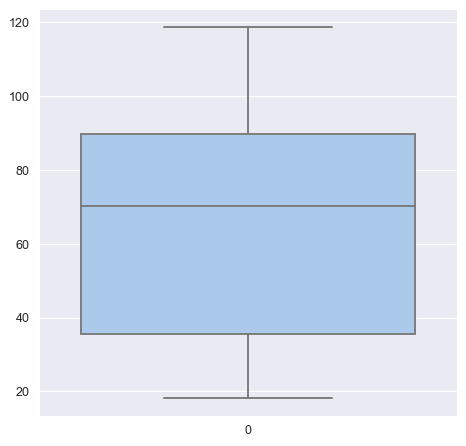

In [6]:
plt.figure(figsize=(6,6), dpi = 90)
sns.set_style("darkgrid")
sns.boxplot(data=contract['MonthlyCharges'], 
            palette = 'pastel')
plt.show()

There are large number of values near 20 in data distribution of `MonthlyCharges` feature. Boxplot shows that data is ok.

In [7]:
contract['TotalCharges'] = (contract["TotalCharges"]
                           .replace(" ",np.nan)
                           .astype(float))

Text(0, 0.5, 'Quantity')

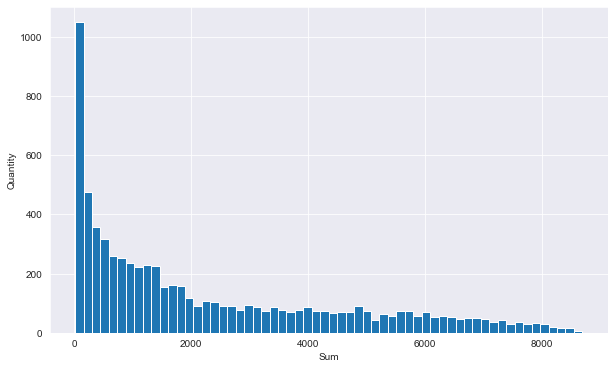

In [8]:
contract['TotalCharges'].hist(bins=60, 
                        figsize=(10,6))
plt.xlabel('Sum')
plt.ylabel('Quantity')

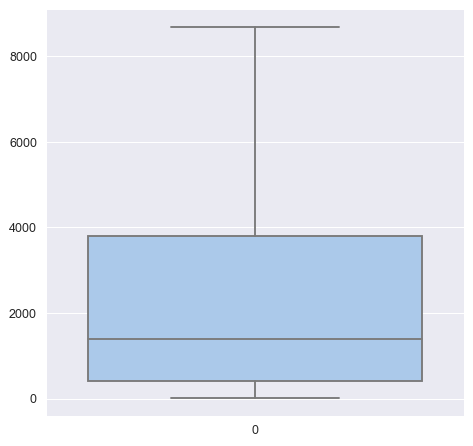

In [9]:
plt.figure(figsize=(6,6), dpi = 90)
sns.set_style("darkgrid")
sns.boxplot(data=contract['TotalCharges'], 
            palette = 'pastel')
plt.show()

There are large number of values near 0 in data distribution of `TotalCharges` feature. Let's check these values later.  Boxplot shows that data is ok.

Need to ckeck missing values in `TotalCharges` feature

In [10]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7032 non-null   float64
dtypes: float64(2), object(6)
memory usage: 440.3+ KB


We have 11 missing values

In [11]:
contract.loc[contract['TotalCharges'].isna()]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,NaN
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,NaN
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,NaN
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,NaN
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,NaN
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,NaN
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,NaN
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,NaN
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,NaN


These missing values appear because of the begin date to correspond to date of data upload. It's possible to fill the missing values with the same in `MonthlyCharges`

In [12]:
contract['TotalCharges'] = contract['TotalCharges'].fillna(contract['MonthlyCharges'])

In [13]:
contract['TotalCharges'].isna().sum()

0

In [14]:
contract['TotalCharges'][6754]

61.9

Missing values are filled. Let's check if there are any 0 values in `TotalCharges` feature

In [15]:
contract.loc[contract['TotalCharges'] < 19]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1151,8992-CEUEN,2020-01-01,No,Month-to-month,No,Electronic check,18.85,18.85
1654,2967-MXRAV,2020-01-01,No,One year,No,Mailed check,18.80,18.80
4939,9975-SKRNR,2020-01-01,No,Month-to-month,No,Mailed check,18.90,18.90
6489,9318-NKNFC,2019-11-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,18.85,18.85


There are no 0 values

Now we merge all sheets

In [16]:
data = (personal
        .merge(contract, on=['customerID'], how='left')
        .merge(phone, on=['customerID'], how='left')
        .merge(internet, on=['customerID'], how='left')
       )
data

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,NaN,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,No,No,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,0,No,No,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,Male,0,No,No,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,NaN,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Female,0,No,No,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.50,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.90,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,NaN,DSL,Yes,No,No,No,No,No
7041,8361-LTMKD,Male,1,Yes,No,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,Fiber optic,No,No,No,No,No,No


Need to check if there are any missing values in new sheet. Also it's better to change values in `SeniorCitizen` feature for further convenience in encoding

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   BeginDate         7043 non-null   object 
 6   EndDate           7043 non-null   object 
 7   Type              7043 non-null   object 
 8   PaperlessBilling  7043 non-null   object 
 9   PaymentMethod     7043 non-null   object 
 10  MonthlyCharges    7043 non-null   float64
 11  TotalCharges      7043 non-null   float64
 12  MultipleLines     6361 non-null   object 
 13  InternetService   5517 non-null   object 
 14  OnlineSecurity    5517 non-null   object 
 15  OnlineBackup      5517 non-null   object 
 16  DeviceProtection  5517 non-null   object 


All missing values are in other services. it can be assumed, that such services are not popular and main services for clients are calls and internet. Such missing values should be filled with **No** value.

In [18]:
data['SeniorCitizen'] = data['SeniorCitizen'].replace({1:'Yes', 0:'No'})

Formate names of features

In [19]:
data.rename(columns = {'customerID':'CustomerId', 'gender':'Gender', 'StreamingTV':'StreamingTv'}, inplace = True) 
data.columns = data.columns.str.findall('[A-Z][^A-Z]*').map(lambda x : '_'.join(y.lower() for y in x) )

In [20]:
data.head()

,customer_id,gender,senior_citizen,partner,dependents,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590-VHVEG,Female,No,Yes,No,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,NaN,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,No,No,No,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,No,No,No,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,Male,No,No,No,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,NaN,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Female,No,No,No,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,No,Fiber optic,No,No,No,No,No,No


We create target feature `churn`, where **1** value means client left, **0** - still with company

In [21]:
def churn(value): 
    if value == 'No': 
        return 0 
    else: 
        return 1
    
data['churn'] = data['end_date'].apply(churn)

Here is Class Balance

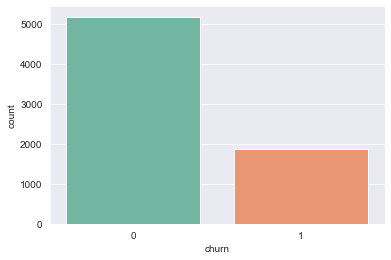

In [22]:
sns.countplot(data['churn'], palette = "Set2");

Negative class is near three times more than positive

To track period in which customers leave more often we create new feature `total_days`

In [23]:
data['begin_date'] = data['begin_date'].apply(pd.to_datetime)

data['end_date'] = (data['end_date']
                    .replace('No','2020-02-01')
                    .apply(pd.to_datetime)
                   )

data['total_days'] = (data['end_date'] - data['begin_date']).dt.days

In new data set we fill missing values with **No** value.

In [24]:
data = (data.fillna('No')
        .drop(['begin_date', 'end_date'], axis=1)
       )

Set `customer_id` as index column

In [25]:
data = data.set_index('customer_id')

To check multicollinearity problem we use Phik

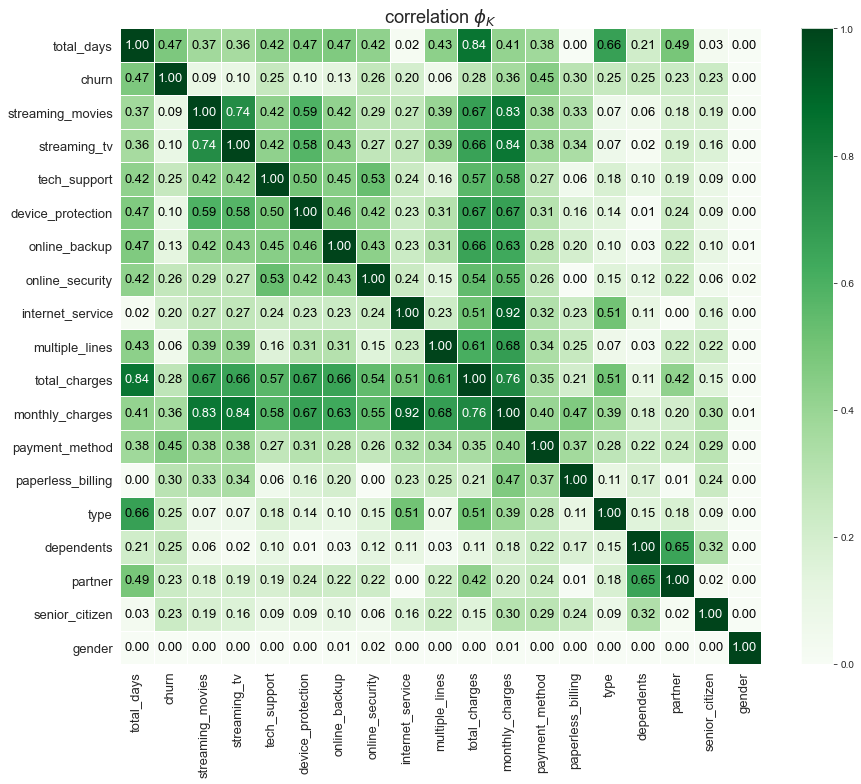

In [26]:
interval_cols = ['monthly_charges', 'total_charges', 'total_days', 'churn']
phik_overview = data.phik_matrix(interval_cols=interval_cols)

plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.3, 
                        figsize=(13, 11))
plt.tight_layout()

Observe strong correlation between variables such as `streaming_tv` and `streaming_movies`. These feautures seem to be practically the same, because streaming_movies are usually part of streaming_tv. So we can delete `streaming_movies` feature. There is also strong correlation between variables such as `total_charges` and `monthly_charges`. Since we have `total_days` feature we can delete `total_charges`. If we need we are able to recover data from `total_charges` using `monthly_charges` and `total_days`.

Look at current and left customers

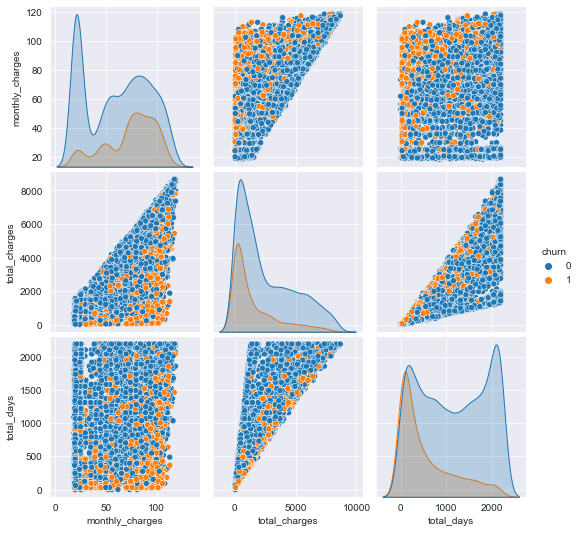

In [27]:
sns.pairplot(data, hue='churn');

Dropout peak is in beginning of service(see total_days) 

Check days with dropout peak

In [28]:
data.pivot_table(index='total_days', 
                 values='churn', 
                 aggfunc='sum').head(10)

,churn
total_days,
0,0
30,182
31,198
61,123
62,0
91,31
92,63
122,58
123,25


The highest outflow is in first **61** days

Check other peaks on chart

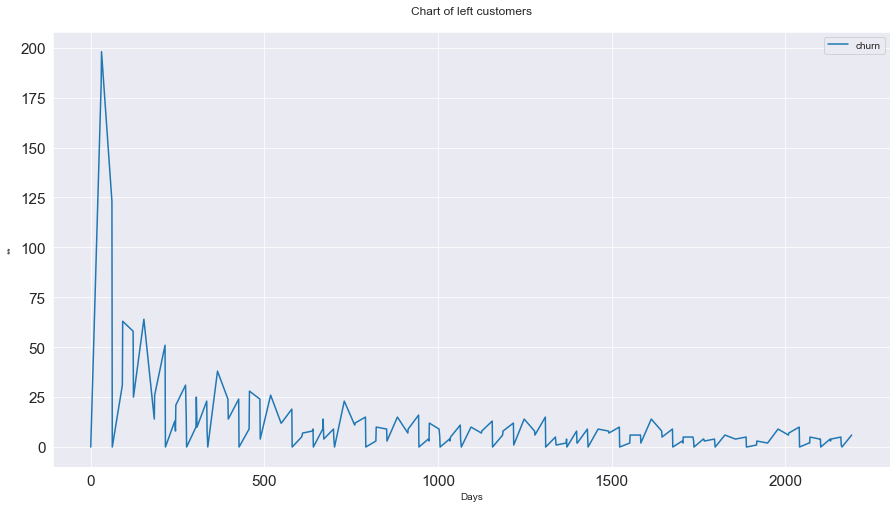

In [29]:
(data.pivot_table(columns='total_days',
                  values='churn', 
                  aggfunc='sum')
                                .T
                                .plot(kind='line', 
                                      figsize=(15,8), 
                                      fontsize=15.3)
)
plt.title('Chart of left customers'+ "\n")
plt.xlabel('Days')
plt.ylabel('**');

There are no any other peaks. Look at boxplot


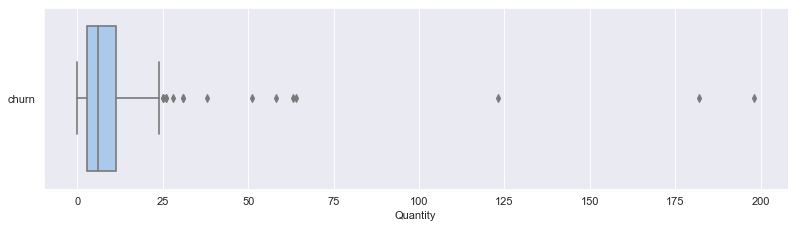

In [30]:
plt.figure(figsize=(12,3), dpi = 80)
sns.set_style("darkgrid")
sns.boxplot(data=data.pivot_table(index='total_days', 
                 values='churn', 
                 aggfunc='sum'),
            orient='h',
            palette = 'pastel')
plt.xlabel('Quantity')
plt.show()

Outflow of **25** customers is normal, all above is anomaly

Count sum of money of current and left clients. Estimate share of left clients' sum to total sum

In [31]:
data.pivot_table(index='churn', 
                 values='total_charges', 
                 aggfunc='sum').head(20)

,total_charges
churn,
0,13193697.4
1,2862926.9


In [32]:
left = data.loc[data['churn'] == 1]

In [33]:
(round(left['total_charges'].sum() 
       / data['total_charges'].sum(), 2)
)

0.18

The share of left clients' charges is **18%**. Bad news

Now we look at clients who leave in the first 61 days and count share of their charges to total sum of charges of all clients

In [34]:
(round(left.loc[left['total_days'] < 62]
                    ['total_charges'].sum() 
       / data['total_charges'].sum(), 3)
)

0.002

Quantity of clients who leave in the first 61 days

In [35]:
left.loc[left['total_days'] < 62]['churn'].sum()

503

Quantity of clients who leave after 61 days

In [36]:
left.loc[left['total_days'] > 62]['churn'].sum()

1366

Clients who leave in first **61** days make up **one third** of all left. And their charges are only **0,2%** of all charges

Check the most frequent contract of left customers

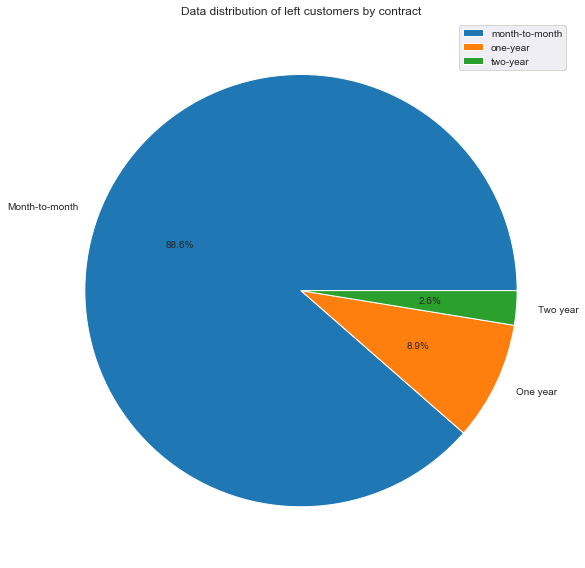

In [37]:
(left.pivot_table(index='type', 
                 values='churn', 
                 aggfunc='sum')
                               .plot(kind='pie', 
                                     autopct='%1.1f%%', 
                                     subplots=True, 
                                     figsize=(10,8))
)
plt.legend(['month-to-month', 'one-year', 'two-year'])
plt.title('Data distribution of left customers by contract')
plt.tight_layout()
plt.axis('off');

Customers with **month-to-month** contract cancel **9** times more often then customers with both one and two years contracts

### Data analysis conclusion
- The highest outflow is in first **61** days.
- The share of left clients' charges is **18%**.
- Customers with month-to-month contract cancel **9** times more often then customers with both one and two years contracts.

## Model learning

Train-test split

In [38]:
features_train, features_test, target_train, target_test = train_test_split(
                                    data.drop(['churn', 
                                               'total_charges', 
                                               'streaming_movies'], axis=1), 
                                              data['churn'], 
                                              test_size=0.25, 
                                              random_state=101022,
                                              stratify=data['churn'])

print(f'Share of train sample:{features_train.shape[0] / len(data):.1%}')
print(f'Share of test sample:{features_test.shape[0] / len(data):.1%}')

Share of train sample:75.0%
Share of test sample:25.0%


Encode features with **object** type using ordinal encoder, because we will use model based on trees

In [39]:
encoder = (ce.OrdinalEncoder(
    cols = features_train.select_dtypes('object').columns)
          )
features_train = encoder.fit_transform(features_train)
features_test = encoder.transform(features_test)

Write function for model learning

In [40]:
def models(model, parametrs, features_train, target_train):
    grid = GridSearchCV(model, 
                        parametrs, 
                        cv=10,
                        #verbose=3,
                        n_jobs=-1, 
                        scoring='roc_auc')
    grid.fit(features_train, target_train)
    return grid.best_score_, grid.best_params_

First model is **CatBoostClassifier**

In [41]:
pipe_cb = Pipeline(steps=
                  [('scaler', StandardScaler()),
                   ('cb', CatBoostClassifier(random_seed=101022,
                                             loss_function='Logloss',
                                             silent=True,
                                             scale_pos_weight=3))])
cb_parametrs = {'cb__depth'         : [4,7,10],
                'cb__learning_rate' : [0.01,0.05,0.1,0.5],
                'cb__iterations'    : [100,500,1000]
               }
cb = models(pipe_cb, 
            cb_parametrs, 
            features_train, target_train)
cb

(0.9256281988009067,
 {'cb__depth': 4, 'cb__iterations': 1000, 'cb__learning_rate': 0.1})

Second model is **LGBMClassifier**

In [42]:
pipe_lgbm = Pipeline(steps=
                    [('scaler', StandardScaler()),
                     ('lgbm', LGBMClassifier(random_state=101022,
                                             objective='binary',
                                             class_weight='balanced'))])

lgbm_parametrs = {'lgbm__max_depth': [4,7,10],
                  'lgbm__learning_rate': [0.01,0.05,0.1,0.5],
                  'lgbm__n_estimators': [100,500,1000]
                 }

lgbm = models(pipe_lgbm, 
              lgbm_parametrs, 
              features_train, target_train)
lgbm

(0.9132386488264972,
 {'lgbm__learning_rate': 0.1,
  'lgbm__max_depth': 4,
  'lgbm__n_estimators': 1000})

Third model is **RandomForestClassifier**

In [43]:
pipe_rfc = Pipeline(steps=
                   [('scaler', StandardScaler()),
                    ('rfc', RandomForestClassifier(random_state=101022,
                                                   class_weight='balanced'))])
rfc_parametrs = {
     'rfc__max_depth': [4,7,10],
     'rfc__criterion': ['gini', 'entropy'],
     'rfc__n_estimators': [100,500,1000]

             }

rfc = models(pipe_rfc, 
             rfc_parametrs, 
             features_train, target_train)
rfc

(0.8628270610722902,
 {'rfc__criterion': 'entropy', 'rfc__max_depth': 7, 'rfc__n_estimators': 1000})

In [44]:
result = pd.DataFrame([cb[0], lgbm[0], rfc[0]], 
                       columns=['roc_auc'], 
                       index=['CatBoost',
                              'LGBM',
                              'RandomForest'])
result

,roc_auc
CatBoost,0.925628
LGBM,0.913239
RandomForest,0.862827


### Model learning conclusion
- Best model is **CatBoostClassifier**
- Best ROC AUC is **0.926**
- Hyperparameters are **depth = 4**, **iterations = 1000**, **learning_rate = 0.1**

Check best model on test sample

In [45]:
best_model = CatBoostClassifier(random_seed=101022, 
                               loss_function='Logloss', 
                               silent=True,
                               scale_pos_weight=3,
                               depth=4, 
                               iterations=1000, 
                               learning_rate=0.1)

best_model.fit(features_train, target_train)
predict_proba = best_model.predict_proba(features_test)[:, 1]
roc_auc_cb = round(roc_auc_score(target_test, predict_proba), 2)

Build **ROC-curve** to see model's prediction quality

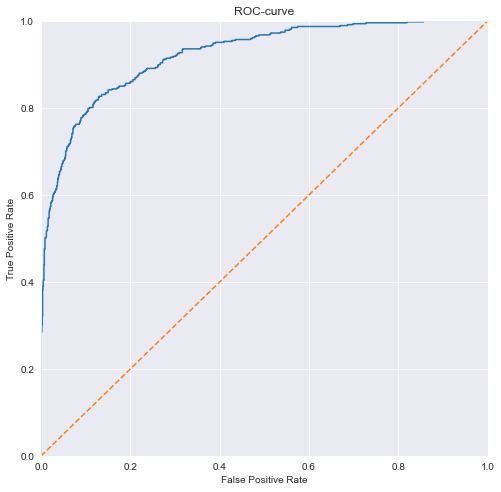

In [46]:
fpr, tpr, thresholds = roc_curve(target_test, predict_proba, pos_label=1)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show() 

Nice done!

What's about **accuracy**?

In [47]:
predicted_test = best_model.predict(features_test) 
acc_cb = round(accuracy_score(target_test, predicted_test), 2)

Confusion matrix

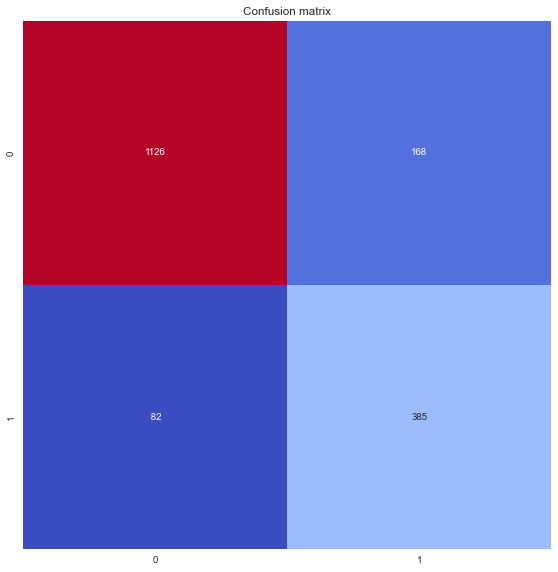

In [48]:
plt.figure(figsize=(10,10), dpi = 70)
sns.heatmap(
    confusion_matrix(target_test, predicted_test), 
    annot = True, 
    cmap= 'coolwarm', 
    cbar=False, 
    square=True,
    fmt='3.0f')
plt.title('Confusion matrix');

Check constant model ROC AUC and accuracy

In [49]:
dummy_clf = DummyClassifier(strategy="stratified", random_state=101022)
dummy_clf.fit(features_train, target_train)
dummy_pred_proba = dummy_clf.predict_proba(features_test)[:, 1]
dummy_pred = dummy_clf.predict(features_test)

In [50]:
roc_auc_dummy = round(roc_auc_score(target_test, dummy_pred_proba), 2)

In [51]:
acc_dummy = round(accuracy_score(target_test, dummy_pred), 2)

Compare results

In [52]:
final_result = pd.DataFrame([[roc_auc_cb, acc_cb], [roc_auc_dummy, acc_dummy]], 
                       columns=['roc_auc', 'accuracy'], 
                       index=['CatBoost',
                              'Dummy'])
final_result

,roc_auc,accuracy
CatBoost,0.92,0.86
Dummy,0.51,0.62


Look at feature importance for best model

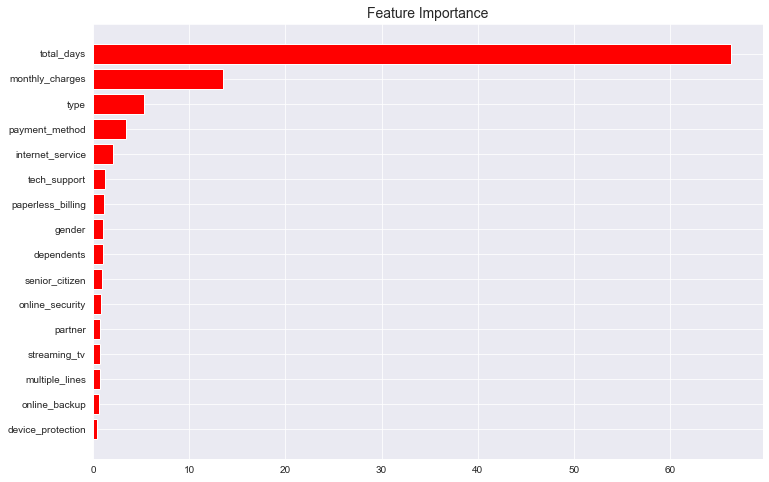

In [53]:
feature_importance = best_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx)), 
         feature_importance[sorted_idx], 
         align='center', 
         color='r')
plt.yticks(range(len(sorted_idx)), 
           np.array(features_test.columns)[sorted_idx])
plt.title('Feature Importance', fontsize = 14);

### Best model testing conclusion
- ROC-curve shows that model predict pretty qualitatively and not by accident
- Confusion matrix: model marked **FP**(False Positive) 168 times and **FN**(False Negative) 82 times. **TP**(True Positive) model marked almost 1126 times, so we have **recall 0,93** and **precision 0,87**. It means that model has really good quality.
- ROC AUC is **0.92**
- Accuracy is **0.86**
- Best model has better predictions then constant one. Validity check is done.
- `total_days` feature is the most important for our model. Then goes `monthly_charges` and `type`.

## Report

### Project description
Telecom operator would like to predict churn of clients.

Company mainly provides two types of services: 

1. Landline communication.
2. Internet. 

Some other services the company provides include:

- Internet security: antivirus software (DeviceProtection) and a malicious website blocker (OnlineSecurity)
- A dedicated technical support line (TechSupport)
- Cloud file storage and data backup (OnlineBackup)
- TV streaming (StreamingTV) and a movie directory (StreamingMovies)

The clients can choose either a monthly payment or sign a 1- or 2-year contract.

### Data preprocessing

During data preprocessing, the following actions were performed:
 - Changed type of `total_charges` feature to float using **.astype()** method. `begin_date`, `end_date` type was changed using **pd.to_datetime()**.
 - Added target feature `churn` where **1** means client left, **0** means client still uses services.
 - Added `total_days` feature as difference between `end_date` and `begin_date`.
 - Deleted `begin_date` and `end_date` features to avoid leakage of target feature when training models.
 - Merged all sheets into one with name `data` using `customerID` feature as key. We used **.merge()** method.
 - Set `customerID` feature as index with help of **.set_index()** to train model correctly.
 - Formated names of features.
 - Filled missing values with **.fillna()**.

### Exploratory analysis

- Did **EDA**. Used **.hist()**, **.plot()**, **sns.boxplot()**, **sns.pairplot()**, **sns.countplot()**, **phik_matrix()**. During analysis we found that:
    - Negative class is three times more than positive. Need to balace classes when learn models.
    - Analyzing multicollinearity problem with the help of **Phik** correlation, we discovered: 
      - strong correlation between variables such as `streaming_tv` and `streaming_movies`. These feautures seem to be practically the same, because streaming_movies are usually part of streaming_tv. So we can delete `streaming_movies` feature. 
      - strong correlation between variables such as `total_charges` and `monthly_charges`. Since we have `total_days` feature we can delete `total_charges`. If we need we are able to recover data from `total_charges` using `monthly_charges` and `total_days`.
      
    - Outflow of **25** customers is normal, all **above** is anomaly.
    
    <a href="https://ibb.co/5WKF6Hf"><img src="https://i.ibb.co/wNcsRmx/boxplot.png" alt="boxplot" border="0"></a>

    - Share of left clients' charges is **18%**.
    - Highest outflow is in first **61** days.
    - Clients who leave in first **61** days make up one third of all left. And their charges are only **0,2%** of all charges.
    - Customers with month-to-month contract cancel **9** times more often then customers with both one and two years contracts.
    
    <a href="https://imgbb.com/"><img src="https://i.ibb.co/XyKNwq2/pie.png" alt="pie" border="0"></a>
    
### Model learning

 - Models:
    - **CatBoostClassifier**
    - **LGBMClassifier**
    - **RandomForestClassifier**
 - For model learning and searching best hyperparameters we used **GridSearchCV**.
 - Also **PipeLine**  for standardizing features with the help of **StandardScaler()**
 - Comparison of models' results:
 
| Model | ROC AUC |
| ------| ----------- |
| CatBoost     | 0.92 |
| LGBM         | 0.91 |
| RandomForest | 0.86 |

### Best model and its quality

#### Model
Best model is **CatBoostClassifier** with following results:
 - **depth=4**
 - **iterations=1000**
 - **learning_rate=0.1**

#### Quality
Obtained following results:

| Metrics | Result |
| ------- | --------- |
| Accuracy     | 0.86 |
| ROC AUC      | 0.92 |
| Recall       | 0.93 |
| Precision    | 0.87 |


<a href="https://imgbb.com/"><img src="https://i.ibb.co/WfJgsGw/roc-curve.png" alt="roc-curve" border="0"></a>

#### Comparing with Constant model
Best model has better predictions then constant one(**ROC AUC 0.51, Accuracy 0.62**). Validity check is done.

#### Features importance for best model
`total_days` feature is the most important for our model. Then goes `monthly_charges` and `type`.


<a href="https://ibb.co/3RSxnGL"><img src="https://i.ibb.co/2ZczTmf/fi.png" alt="fi" border="0"></a>



## Business recommendation

 1. Should take a closer look at customers who drop services in the first 61 days. Although they bring only 0.2% of total revenue, at the same time such clients make up one third of all left people. It seems quite possible to introduce a new package of services for such clients.
 2. For customers who outflow after 61 days will be very useful to offer loyalty programs, 'cause their share of total charges is 17.8%.
 3. It is necessary to update or optimize month-to-month contract. Customers with month-to-month contract cancel 9 times more often then customers with both one and two years contracts.